In [2]:
import pandas as pd
import numpy as np

In [3]:


#Specify the path to your CSV file
csv_file_path = r'C:\Users\yiaohui\Downloads\bybit_linear_BTCUSDT_candles_1d_20200501_20240522.csv'
#Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df

,time,open,high,low,close,volume
0,2020-05-01,8625.0,9060.5,8619.0,8820.5,14867.967
1,2020-05-02,8820.5,9010.0,8757.0,8972.5,11679.001
2,2020-05-03,8972.5,9191.0,8725.0,8895.0,20851.730
3,2020-05-04,8895.0,8953.0,8525.0,8873.0,16186.017
4,2020-05-05,8873.0,9105.5,8771.0,9023.5,15659.189
...,...,...,...,...,...,...
1478,2024-05-18,66973.0,67346.5,66469.0,66875.8,43134.141
1479,2024-05-19,66875.8,67737.7,65822.0,66235.6,62553.289
1480,2024-05-20,66235.6,71638.3,66034.0,71436.9,156122.400
1481,2024-05-21,71436.9,72061.7,69155.0,70167.8,117990.801


In [20]:
#calculate the price change between current and previous candle
rolling_window = 40
df['price_chg'] = df['close'].pct_change()
#rolling mean
df['sma'] = df['close'].rolling(window=rolling_window).mean()
#rolling std
df['rolling_std'] = df['close'].rolling(window=rolling_window).std()
#zscore = (closeprice - mean) / std
df['z_score'] = (df['close'] - df['sma']) / df['rolling_std']
df

,time,open,high,low,close,volume,price_chg,sma,rolling_std,z_score,position,trades,pnl,trade,cumu
0,2020-05-01,8625.0,9060.5,8619.0,8820.5,14867.967,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.000000
1,2020-05-02,8820.5,9010.0,8757.0,8972.5,11679.001,0.017233,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.000000
2,2020-05-03,8972.5,9191.0,8725.0,8895.0,20851.730,-0.008638,NaN,NaN,NaN,0.0,0.0,-0.000000,0.0,0.000000
3,2020-05-04,8895.0,8953.0,8525.0,8873.0,16186.017,-0.002473,NaN,NaN,NaN,0.0,0.0,-0.000000,0.0,0.000000
4,2020-05-05,8873.0,9105.5,8771.0,9023.5,15659.189,0.016962,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,2024-05-18,66973.0,67346.5,66469.0,66875.8,43134.141,-0.001451,63976.8300,2702.498899,1.072700,0.0,0.0,-0.001451,0.0,1.350615
1479,2024-05-19,66875.8,67737.7,65822.0,66235.6,62553.289,-0.009573,63903.0450,2594.742777,0.898954,0.0,0.0,-0.009573,0.0,1.341042
1480,2024-05-20,66235.6,71638.3,66034.0,71436.9,156122.400,0.078527,63922.5725,2649.232744,2.836417,0.0,0.0,0.078527,0.0,1.419569
1481,2024-05-21,71436.9,72061.7,69155.0,70167.8,117990.801,-0.017765,63925.8050,2656.954158,2.349305,0.0,0.0,-0.017765,0.0,1.401804


In [18]:
#convert zscore into array and convert NaN to 0.0
not_clean_z_score = df["z_score"].values
z_score = np.nan_to_num(not_clean_z_score)
position = np.array([0.0] * len(df))
df['position'] = position
df

,time,open,high,low,close,volume,price_chg,sma,rolling_std,z_score,position,trades,pnl,trade,cumu
0,2020-05-01,8625.0,9060.5,8619.0,8820.5,14867.967,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.000000
1,2020-05-02,8820.5,9010.0,8757.0,8972.5,11679.001,0.017233,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.000000
2,2020-05-03,8972.5,9191.0,8725.0,8895.0,20851.730,-0.008638,NaN,NaN,NaN,0.0,0.0,-0.000000,0.0,0.000000
3,2020-05-04,8895.0,8953.0,8525.0,8873.0,16186.017,-0.002473,NaN,NaN,NaN,0.0,0.0,-0.000000,0.0,0.000000
4,2020-05-05,8873.0,9105.5,8771.0,9023.5,15659.189,0.016962,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,2024-05-18,66973.0,67346.5,66469.0,66875.8,43134.141,-0.001451,63976.8300,2702.498899,1.072700,0.0,0.0,-0.001451,0.0,1.350615
1479,2024-05-19,66875.8,67737.7,65822.0,66235.6,62553.289,-0.009573,63903.0450,2594.742777,0.898954,0.0,0.0,-0.009573,0.0,1.341042
1480,2024-05-20,66235.6,71638.3,66034.0,71436.9,156122.400,0.078527,63922.5725,2649.232744,2.836417,0.0,0.0,0.078527,0.0,1.419569
1481,2024-05-21,71436.9,72061.7,69155.0,70167.8,117990.801,-0.017765,63925.8050,2656.954158,2.349305,0.0,0.0,-0.017765,0.0,1.401804


In [6]:
position

array([0., 0., 0., ..., 0., 0., 0.])

In [7]:
long_trade = 0
short_trade = 0
# loopp all the zscore for entry and exit based on z_score
z_score_threshold = 1.0
for i in range(1, len(position)):
    if z_score[i] >= z_score_threshold:
        position[i] = 1
        # previous position = 0 or -1 , current position = 1
        if position[i-1] != position[i]:
            long_trade += 1
    elif z_score[i] <= z_score_threshold * -1.0: # 1 * -1.0 = -1
        position[i] = -1
        # previous position = 1 or 0, current position = -1
        if position[i-1] != position[i]:
            short_trade += 1
    else:
        position[i] = position[i-1] # previous position = 1, current position = 1

df['position'] = position
df

#my code please check back
#z_score_threshold = 1.0
#for i in range(1, len(position)):
   # if z_score[i] >= z_score_threshold:
       # position[i] = 1
    #elif z_score[i] <= -z_score_threshold:
        #position[i] = 0
    #else:
       # position[i] = position[i-1] # previous position = 1, current position = 1

#df['position'] = position

,time,open,high,low,close,volume,price_chg,sma,rolling_std,z_score,position
0,2020-05-01,8625.0,9060.5,8619.0,8820.5,14867.967,NaN,NaN,NaN,NaN,0.0
1,2020-05-02,8820.5,9010.0,8757.0,8972.5,11679.001,0.017233,NaN,NaN,NaN,0.0
2,2020-05-03,8972.5,9191.0,8725.0,8895.0,20851.730,-0.008638,NaN,NaN,NaN,0.0
3,2020-05-04,8895.0,8953.0,8525.0,8873.0,16186.017,-0.002473,NaN,NaN,NaN,0.0
4,2020-05-05,8873.0,9105.5,8771.0,9023.5,15659.189,0.016962,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1478,2024-05-18,66973.0,67346.5,66469.0,66875.8,43134.141,-0.001451,62747.105,2389.719039,1.727691,1.0
1479,2024-05-19,66875.8,67737.7,65822.0,66235.6,62553.289,-0.009573,62867.490,2504.900599,1.344608,1.0
1480,2024-05-20,66235.6,71638.3,66034.0,71436.9,156122.400,0.078527,63406.540,3094.546753,2.595004,1.0
1481,2024-05-21,71436.9,72061.7,69155.0,70167.8,117990.801,-0.017765,64000.005,3199.726325,1.927601,1.0


In [23]:
# After done entry and exit logic
# Calculate performance 
interval_pnl = [0]
trades = [0]
# get the trades
for i in range(1,len(df)):
    # if previous position is not same as current position , mean got trade executed
    # example, previous position = 0, current position = -1 , trades = 0 - (-1) = 1
    # previous position = 0, current position = 1 , trades = 0 - 1 = abs(-1) = 1
    # previous position = 1, current position = -1 , trades = 1 - (-1) = abs(2) = 2
    # previous position = -1, current position = 1 , trades = -1 - 1 = abs(-2) = 2
    if position[i-1] != position[i]:
        trades.append(abs(position[i-1] - position[i]))
    else:
        trades.append(0)
df['trades'] = trades
df



,time,open,high,low,close,volume,price_chg,sma,rolling_std,z_score,position,trades,pnl,trade,cumu
0,2020-05-01,8625.0,9060.5,8619.0,8820.5,14867.967,NaN,NaN,NaN,NaN,0.0,0,0.000000,0.0,0.000000
1,2020-05-02,8820.5,9010.0,8757.0,8972.5,11679.001,0.017233,NaN,NaN,NaN,0.0,0,0.000000,0.0,0.000000
2,2020-05-03,8972.5,9191.0,8725.0,8895.0,20851.730,-0.008638,NaN,NaN,NaN,0.0,0,-0.000000,0.0,0.000000
3,2020-05-04,8895.0,8953.0,8525.0,8873.0,16186.017,-0.002473,NaN,NaN,NaN,0.0,0,-0.000000,0.0,0.000000
4,2020-05-05,8873.0,9105.5,8771.0,9023.5,15659.189,0.016962,NaN,NaN,NaN,0.0,0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,2024-05-18,66973.0,67346.5,66469.0,66875.8,43134.141,-0.001451,63976.8300,2702.498899,1.072700,0.0,0,-0.001451,0.0,1.350615
1479,2024-05-19,66875.8,67737.7,65822.0,66235.6,62553.289,-0.009573,63903.0450,2594.742777,0.898954,0.0,0,-0.009573,0.0,1.341042
1480,2024-05-20,66235.6,71638.3,66034.0,71436.9,156122.400,0.078527,63922.5725,2649.232744,2.836417,0.0,0,0.078527,0.0,1.419569
1481,2024-05-21,71436.9,72061.7,69155.0,70167.8,117990.801,-0.017765,63925.8050,2656.954158,2.349305,0.0,0,-0.017765,0.0,1.401804


In [9]:
# calculate the PnL by using trades and position, and also fees 
price_change = df['price_chg'].values
fees = 0.06
for i in range(1,len(df)):
    interval_pnl.append(position[i-1] * price_change[i] - trades[i] * fees / 100) 

In [10]:
df['pnl'] = interval_pnl
df['position'] = position
df['trade'] = trades
df['cumu'] = df['pnl'].cumsum()
df

,time,open,high,low,close,volume,price_chg,sma,rolling_std,z_score,position,trades,pnl,trade,cumu
0,2020-05-01,8625.0,9060.5,8619.0,8820.5,14867.967,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.000000
1,2020-05-02,8820.5,9010.0,8757.0,8972.5,11679.001,0.017233,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.000000
2,2020-05-03,8972.5,9191.0,8725.0,8895.0,20851.730,-0.008638,NaN,NaN,NaN,0.0,0.0,-0.000000,0.0,0.000000
3,2020-05-04,8895.0,8953.0,8525.0,8873.0,16186.017,-0.002473,NaN,NaN,NaN,0.0,0.0,-0.000000,0.0,0.000000
4,2020-05-05,8873.0,9105.5,8771.0,9023.5,15659.189,0.016962,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,2024-05-18,66973.0,67346.5,66469.0,66875.8,43134.141,-0.001451,62747.105,2389.719039,1.727691,1.0,0.0,-0.001451,0.0,1.350615
1479,2024-05-19,66875.8,67737.7,65822.0,66235.6,62553.289,-0.009573,62867.490,2504.900599,1.344608,1.0,0.0,-0.009573,0.0,1.341042
1480,2024-05-20,66235.6,71638.3,66034.0,71436.9,156122.400,0.078527,63406.540,3094.546753,2.595004,1.0,0.0,0.078527,0.0,1.419569
1481,2024-05-21,71436.9,72061.7,69155.0,70167.8,117990.801,-0.017765,64000.005,3199.726325,1.927601,1.0,0.0,-0.017765,0.0,1.401804


In [11]:
# Max drowdown
mdd = min(interval_pnl)
mdd

-0.14563918757467142

In [12]:
# mean of PnL
mean = np.mean(interval_pnl)
# standard deviation of PnL
stddev = np.std(interval_pnl)

# SR multiplier => daily data = 365 * 1
#                  1 hour data = 365 * 24
sr_multiplier = 1
# Sharpe ratio = mean of pnl / std of pnl * square root of (365 * sr_multiplier)
sharpe_ratio = mean / stddev * np.sqrt(365 * sr_multiplier)
sharpe_ratio

0.5452905032093568

In [26]:
# Performance report
data = {
        'rolling_window': rolling_window,
        'z_score_threshold': z_score_threshold,
        'num_of_trades': np.sum(trades),
        'long_trades': long_trade,
        'short_trades': short_trade,
        'cumu': df['cumu'].iat[-1],
        'AR': mean * 365 * sr_multiplier,
        'MDD': mdd,
        'CR': mean * 365 * sr_multiplier / abs(mdd),
        'SR': sharpe_ratio 
    }

# performance report of backtest
data

{'rolling_window': 40,
 'z_score_threshold': 1.0,
 'num_of_trades': 0,
 'long_trades': 29,
 'short_trades': 29,
 'cumu': 1.3881549579198218,
 'AR': 0.3416564798656339,
 'MDD': -0.14563918757467142,
 'CR': 2.345910366263623,
 'SR': 0.5452905032093568}

In [14]:
# convert all_result array into dataframe
all_sr = pd.DataFrame([data])
all_sr

,rolling_window,z_score_threshold,num_of_trades,long_trades,short_trades,cumu,AR,MDD,CR,SR
0,20,1.0,115.0,29,29,1.388155,0.341656,-0.145639,2.34591,0.545291


In [15]:
# get the pivot table
df_pivot = all_sr.pivot(index="rolling_window",columns ='z_score_threshold', values="SR")
df_pivot

z_score_threshold,1.0
rolling_window,
20,0.545291


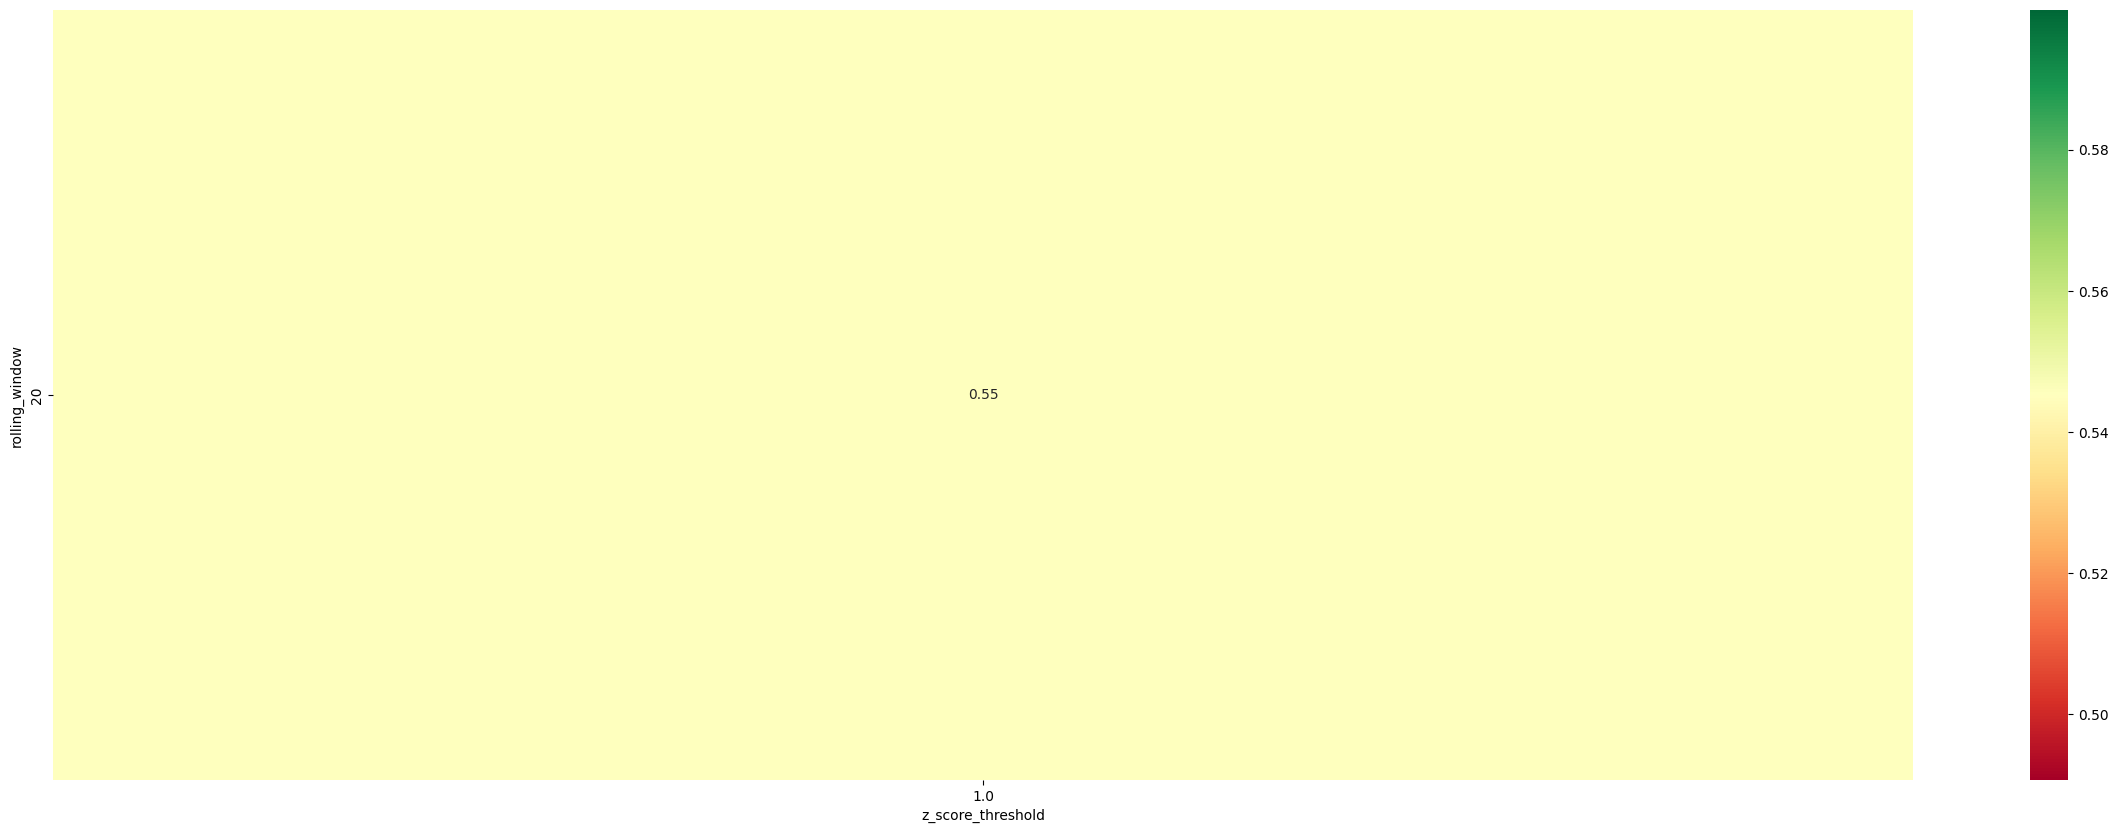

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(df_pivot,annot=True, cmap='RdYlGn')
# Show the plot
plt.show()